In [1]:
%%capture capt
!pip install tensorflow

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("GPU is", "available" if tf.config.list_physical_devices("GPU") else "NOT AVAILABLE")

2023-11-26 13:35:10.038549: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-26 13:35:10.042797: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-26 13:35:10.093381: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-26 13:35:10.093423: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-26 13:35:10.094990: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

Version:  2.15.0
Eager mode:  True
GPU is NOT AVAILABLE


In [3]:
from TSNE import TSNE
from sklearn.manifold import TSNE as sk_TSNE

# Test on MNIST data

In [4]:
path_to_mnist_dataset = "digits.npz"

In [5]:
mnist_loader = np.load(path_to_mnist_dataset)
# mnist_matrices = np.concatenate((mnist_loader["x"], mnist_loader["xt"]), axis=0) / 255
# mnist_labels = np.concatenate((mnist_loader["y"], mnist_loader["yt"]), axis=0)
mnist_matrices = mnist_loader["xt"] / 255
mnist_labels = mnist_loader["yt"]
mnist_loader.close()

In [6]:
def plot_digit(ax, digit_vector, title=None, color="red"):
    digit = digit_vector.reshape(28, 28)
    ax.imshow(digit, cmap="gray")
    ax.set_xticks([])
    ax.set_yticks([])
    if title is not None:
        ax.set_title(title, color="red" if color is None else color)

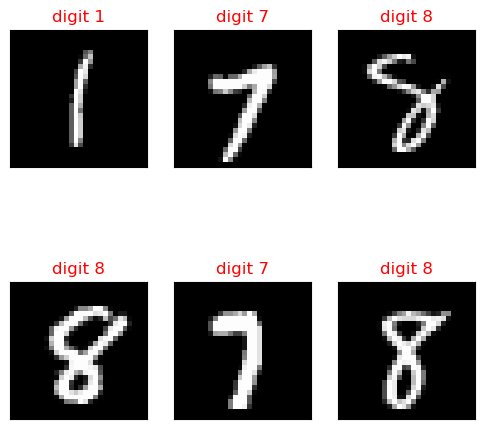

In [7]:
nrows, ncols = 2, 3
to_display = np.random.choice(range(len(mnist_matrices)), size=nrows*ncols)

fig, axs = plt.subplots(nrows, ncols, figsize=(3*nrows, 2*ncols))
cur_display = 0
for i in range(nrows):
    for j in range(ncols):
        digit_vector = mnist_matrices[to_display[cur_display]]
        plot_digit(axs[i][j], digit_vector, title=f"digit {mnist_labels[to_display[cur_display], 0]}")
        cur_display += 1

### Scikit-learn t-SNE on MNIST data

In [8]:
mnist_perplexity = 30

In [9]:
mnist_tsne = sk_TSNE(n_components=2, learning_rate='auto', perplexity=mnist_perplexity, init='random').fit_transform(mnist_matrices)

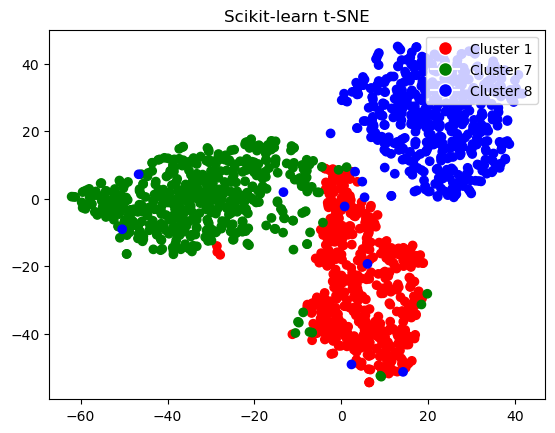

In [10]:
colors = {1: "red", 7: "green", 8: "blue"}
plt.scatter(mnist_tsne[:, 0], mnist_tsne[:, 1], c=[colors[x[0]] for x in mnist_labels])
legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'Cluster {label}') for label, color in colors.items()]
plt.legend(handles=legend_handles, loc='upper right')
plt.title("Scikit-learn t-SNE");

### Custom t-SNE on MNIST data

In [11]:
mnist_perplexity = 30

In [12]:
#mnist_custom_tsne = TSNE(n_components=2, perplexity=mnist_perplexity, n_steps_probas=300, learning_rate=20, early_exaggeration=1).fit_transform(mnist_matrices, verbose=True)
mnist_custom_tsne = TSNE(n_components=2, perplexity=mnist_perplexity).fit_transform(mnist_matrices, verbose=1)

Starting gradient descent loop...


100%|██████████| 1000/1000 [01:02<00:00, 16.06it/s]


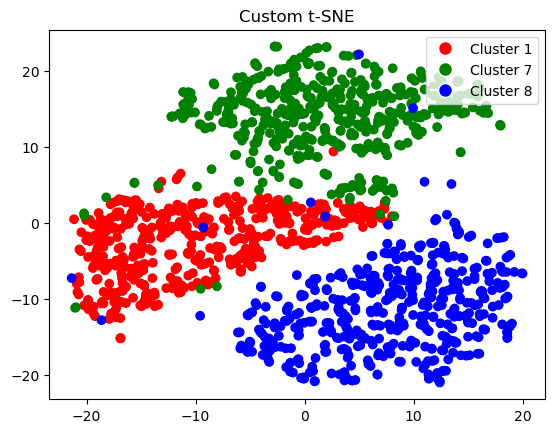

In [13]:
colors = {1: "red", 7: "green", 8: "blue"}
plt.scatter(mnist_custom_tsne[:, 0], mnist_custom_tsne[:, 1], c=[colors[x[0]] for x in mnist_labels])
legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'Cluster {label}') for label, color in colors.items()]
plt.legend(handles=legend_handles, loc='upper right')
plt.title("Custom t-SNE");

# Load trained model

In [14]:
model = tf.keras.models.load_model('model.h5')

In [15]:
embedding = model.layers[0].get_weights()[0]
print(f"Embedding shape: {embedding.shape}")

Embedding shape: (5000, 256)


# Scikit-learn t-SNE

In [16]:
tsne = sk_TSNE(n_components=2, n_jobs=-1)
embedded_data = tsne.fit_transform(embedding)

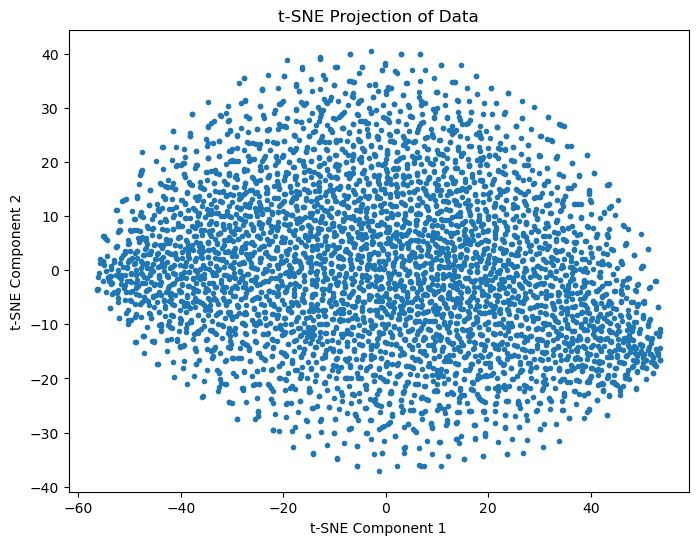

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(embedded_data[:, 0], embedded_data[:, 1], marker='.')
plt.title('t-SNE Projection of Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# Custom t-SNE

In [22]:
t = TSNE(n_components=2, perplexity=30)

In [23]:
low_dim_embedding = t.fit_transform(embedding, verbose=2)

Computing binary search for conditional probabilities...


100%|██████████| 5000/5000 [00:08<00:00, 583.11it/s]


Starting gradient descent loop...


100%|██████████| 1000/1000 [14:27<00:00,  1.15it/s]


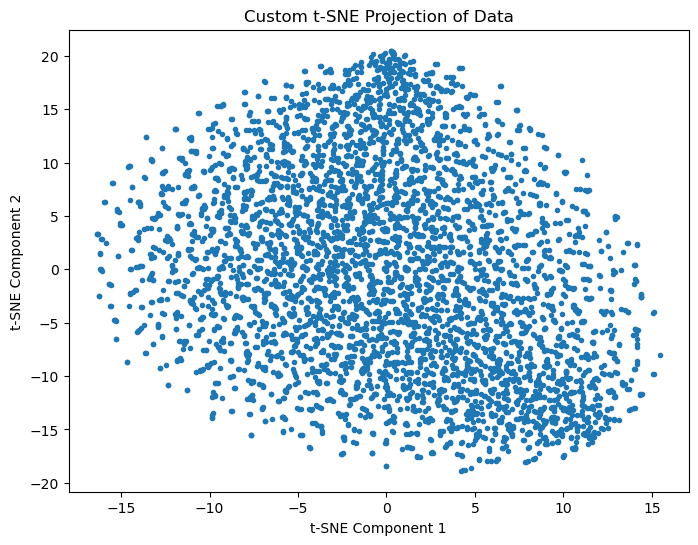

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(low_dim_embedding[:, 0], low_dim_embedding[:, 1], marker='.')
plt.title('Custom t-SNE Projection of Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()